In [ ]:
Case Study
Objective:

• Use k-means clustering for image segmentation and to identify dominant color in the image.

Question:
1.Open and display the image “dog.jpeg”. Convert the image in to numpy array, so that i can be used in 
further processing.
[Hint: Use PIL module from python]

2. Find out the dimensions of the image and convert it in to a two-dimensional array.

3.Use kmeans clustering with k set to 3 and cluster the image. [Hint: Refer to k-means module of scikit learn]

4. Predict the cluster label of every pixel in the image and plot it back as an image.

5. Find out the three dominant color in the image.
[Hint: The cluster centers should correspond to three dominant colors]

In [1]:
from PIL import Image
from numpy import asarray
# load the image
image = Image.open('/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_10_Unsupervised_Learning/dogs.jpeg')
# convert image to numpy array
data = asarray(image)
print(type(data))
# summarize shape
print(data.shape)

# create Pillow image
image2 = Image.fromarray(data)
print(type(image2))

# summarize image details
print(image2.mode)
print(image2.size)

<class 'numpy.ndarray'>
(185, 272, 3)
<class 'PIL.Image.Image'>
RGB
(272, 185)


In [9]:
%matplotlib inlinefrom matplotlib import pyplot as pltplt.imshow(data)
plt.show()

UsageError: unrecognized arguments: matplotlib import pyplot as pltplt.imshow(data)


In [2]:
print(data)

[[[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[240 240 240]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 ...

 [[252 248 249]
  [254 250 251]
  [255 253 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[247 245 246]
  [250 248 249]
  [255 253 254]
  ...
  [255 255 255]
  [252 252 252]
  [244 244 244]]

 [[253 251 254]
  [253 251 254]
  [253 251 252]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]]


In [6]:
#2. Find out the dimensions of the image and convert it in to a two-dimensional array.


from PIL import Image
from numpy import*
temp=asarray(Image.open('/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_10_Unsupervised_Learning/dogs.jpeg'))
x=temp.shape[0]
y=temp.shape[1]*temp.shape[2]
temp.resize((x,y)) # a 2D array
print(temp)

[[240 240 240 ... 254 254 254]
 [240 240 240 ... 254 254 254]
 [240 240 240 ... 254 254 254]
 ...
 [252 248 249 ... 255 255 255]
 [247 245 246 ... 244 244 244]
 [253 251 254 ... 254 254 254]]


In [7]:
print(temp.size)

150960


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))






In [11]:
# Convert PIL image to array
img = Image.open("/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_10_Unsupervised_Learning/dogs.jpeg")
np_array = np.array(img)

print("Array shape")
print(np_array.shape)

print("\nDimensions of the Image")
print("Height : " + str(img.height))
print("Width : " + str(img.width))



Array shape
(185, 272, 3)

Dimensions of the Image
Height : 185
Width : 272


In [13]:

# Reshape the array in 2 dimensions
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])


print(new_array.shape)

(50320, 3)


In [14]:
# Initializing the k means
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

print("\nCluster centroids")
print(kmeans.cluster_centers_)





Cluster centroids
[[ 29.52558775  21.59168945  20.48217605]
 [251.4871407  247.6867877  243.16348966]
 [210.65606557 174.85483607 143.73803279]]


In [15]:

# count elements of each cluster
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())




Elements of Each cluster 
{0: 18291, 1: 19805, 2: 12224}
   col1  col2  col3  cluster
0   240   240   240        1
1   255   255   255        1
2   255   255   255        1
3   251   251   251        1
4   255   255   255        1


/Users/atul595525/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


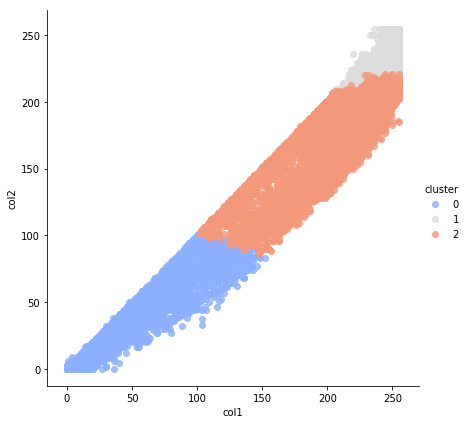

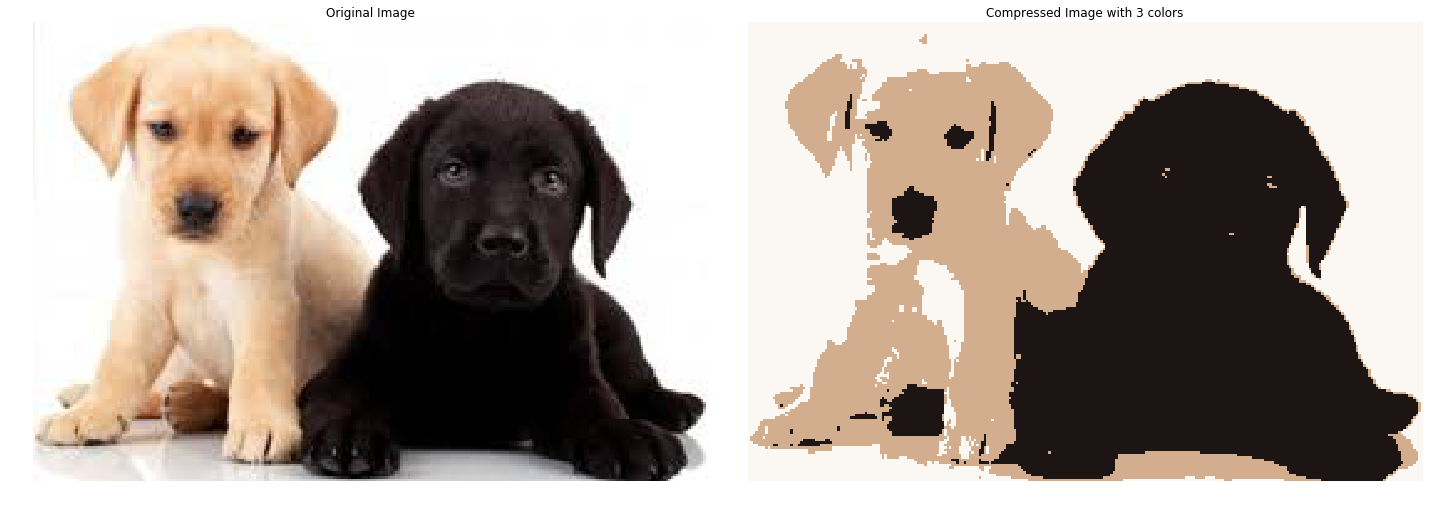

In [16]:
# Plot cluster points
sns.lmplot('col1', 'col2', data=df, hue="cluster",
           palette='coolwarm', size=6, aspect=1, fit_reg=False)


X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    np_array.shape[0], np_array.shape[1], np_array.shape[2])


fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()



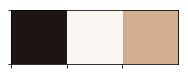

In [17]:
# Find Dominant color 
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()